## This notebook demonstrates how to use wind report data

#### First, download the wind svrgis file with unique ids and UTC time

In [1]:
from svrimg.utils.get_tables import get_table
import pandas as pd

df_svrgis = get_table(which='svrgis', haz_type='wind', data_dir="../data/csvs/")

df_svrgis.head()

C:\Users\ahaberlie1\Anaconda3\envs\svrimg\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,om,tz,st,stf,stn,mag,inj,fat,loss,closs,...,f3,f4,mt,CST_date,CST_time,date_utc,yr,mo,dy,hr
uid,,,,,,,,,,,,,,,,,,,,,
199601020710z000000001_wind,1,3,FL,12,1,0.0,0,0,0.0,0.0,...,0,0,NaN,1996-01-02,01:10:00,1996-01-02 07:10:00,1996,1,2,7
199601021630z000000002_wind,2,3,FL,12,2,55.0,0,0,0.0,0.0,...,0,0,NaN,1996-01-02,10:30:00,1996-01-02 16:30:00,1996,1,2,16
199601021730z000000003_wind,3,3,FL,12,3,55.0,0,0,0.0,0.0,...,0,0,NaN,1996-01-02,11:30:00,1996-01-02 17:30:00,1996,1,2,17
199601021900z000000004_wind,4,3,FL,12,4,55.0,0,0,0.0,0.0,...,0,0,NaN,1996-01-02,13:00:00,1996-01-02 19:00:00,1996,1,2,19
199601021915z000000005_wind,5,3,FL,12,5,55.0,0,0,0.0,0.0,...,0,0,NaN,1996-01-02,13:15:00,1996-01-02 19:15:00,1996,1,2,19


### Subset the dataset for a derecho day--June 29th 2012

In [2]:
import datetime
import pandas as pd

start_time = datetime.datetime(2012, 6, 29, 14, 0)
end_time = datetime.datetime(2012, 6, 30, 6, 0)

df_svrgis['date_utc'] = pd.to_datetime(df_svrgis.date_utc)
df_sub = df_svrgis[(df_svrgis.date_utc >= start_time) & (df_svrgis.date_utc <= end_time)].copy()

df_sub.head()

,om,tz,st,stf,stn,mag,inj,fat,loss,closs,...,f3,f4,mt,CST_date,CST_time,date_utc,yr,mo,dy,hr
uid,,,,,,,,,,,,,,,,,,,,,
201206291518z000394797_wind,394797,3,SD,46,0,52.0,0,0,0.0,0.0,...,0,0,EG,2012-06-29,09:18:00,2012-06-29 15:18:00,2012,6,29,15
201206291525z000393220_wind,393220,3,IL,17,0,52.0,0,0,0.0,0.0,...,0,0,EG,2012-06-29,09:25:00,2012-06-29 15:25:00,2012,6,29,15
201206291530z000394798_wind,394798,3,SD,46,0,52.0,0,0,0.0,0.0,...,0,0,EG,2012-06-29,09:30:00,2012-06-29 15:30:00,2012,6,29,15
201206291540z000394801_wind,394801,3,SD,46,0,52.0,0,0,0.0,0.0,...,0,0,EG,2012-06-29,09:40:00,2012-06-29 15:40:00,2012,6,29,15
201206291545z000393222_wind,393222,3,IL,17,0,54.0,0,0,0.0,0.0,...,0,0,MG,2012-06-29,09:45:00,2012-06-29 15:45:00,2012,6,29,15


### Request images from svrimg.org

In [3]:
from svrimg.utils.get_images import request_images

file_locs = request_images(df_sub.index.values, haz_type='wind')

file_locs

{'201206291518z000394797_wind': '../data/wind/2012/201206291518z000394797_wind.png',
 '201206291525z000393220_wind': '../data/wind/2012/201206291525z000393220_wind.png',
 '201206291530z000394798_wind': '../data/wind/2012/201206291530z000394798_wind.png',
 '201206291540z000394801_wind': '../data/wind/2012/201206291540z000394801_wind.png',
 '201206291545z000393222_wind': '../data/wind/2012/201206291545z000393222_wind.png',
 '201206291554z000393223_wind': '../data/wind/2012/201206291554z000393223_wind.png',
 '201206291720z000381815_wind': '../data/wind/2012/201206291720z000381815_wind.png',
 '201206291742z000381831_wind': '../data/wind/2012/201206291742z000381831_wind.png',
 '201206291757z000381816_wind': '../data/wind/2012/201206291757z000381816_wind.png',
 '201206291801z000381817_wind': '../data/wind/2012/201206291801z000381817_wind.png',
 '201206291804z000381818_wind': '../data/wind/2012/201206291804z000381818_wind.png',
 '201206291805z000381820_wind': '../data/wind/2012/201206291805z0

### Summarize the morphology using PM Mean

PROJ: proj_create_from_database: Cannot find proj.db


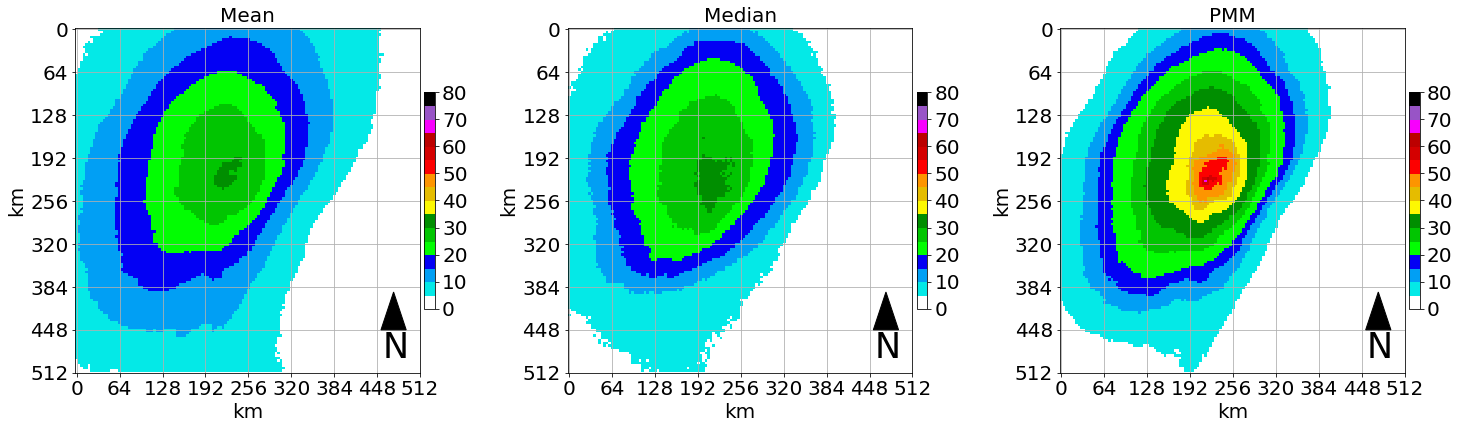

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from svrimg.analysis.pmmean import _run_pmm_one_variable
from svrimg.utils.get_images import get_img_list
from svrimg.mapping.map_helper import draw_box_plot
plt.rcParams['figure.figsize'] = 25, 25
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20


imgs = get_img_list(df_sub.index.values, haz_type="wind", keep_missing=False)

img_mean = np.mean(imgs, axis=0)
img_median = np.median(imgs, axis=0)
img_pmm = _run_pmm_one_variable(imgs)

ax = plt.subplot(2,3,1)
ax.set_title("Mean", fontsize=20)
ax = draw_box_plot(ax, img_mean)

ax = plt.subplot(2,3,2)
ax.set_title("Median", fontsize=20)
ax = draw_box_plot(ax, img_median)

ax = plt.subplot(2,3,3)
ax.set_title("PMM", fontsize=20)
ax = draw_box_plot(ax, img_pmm)

### Show summary over time

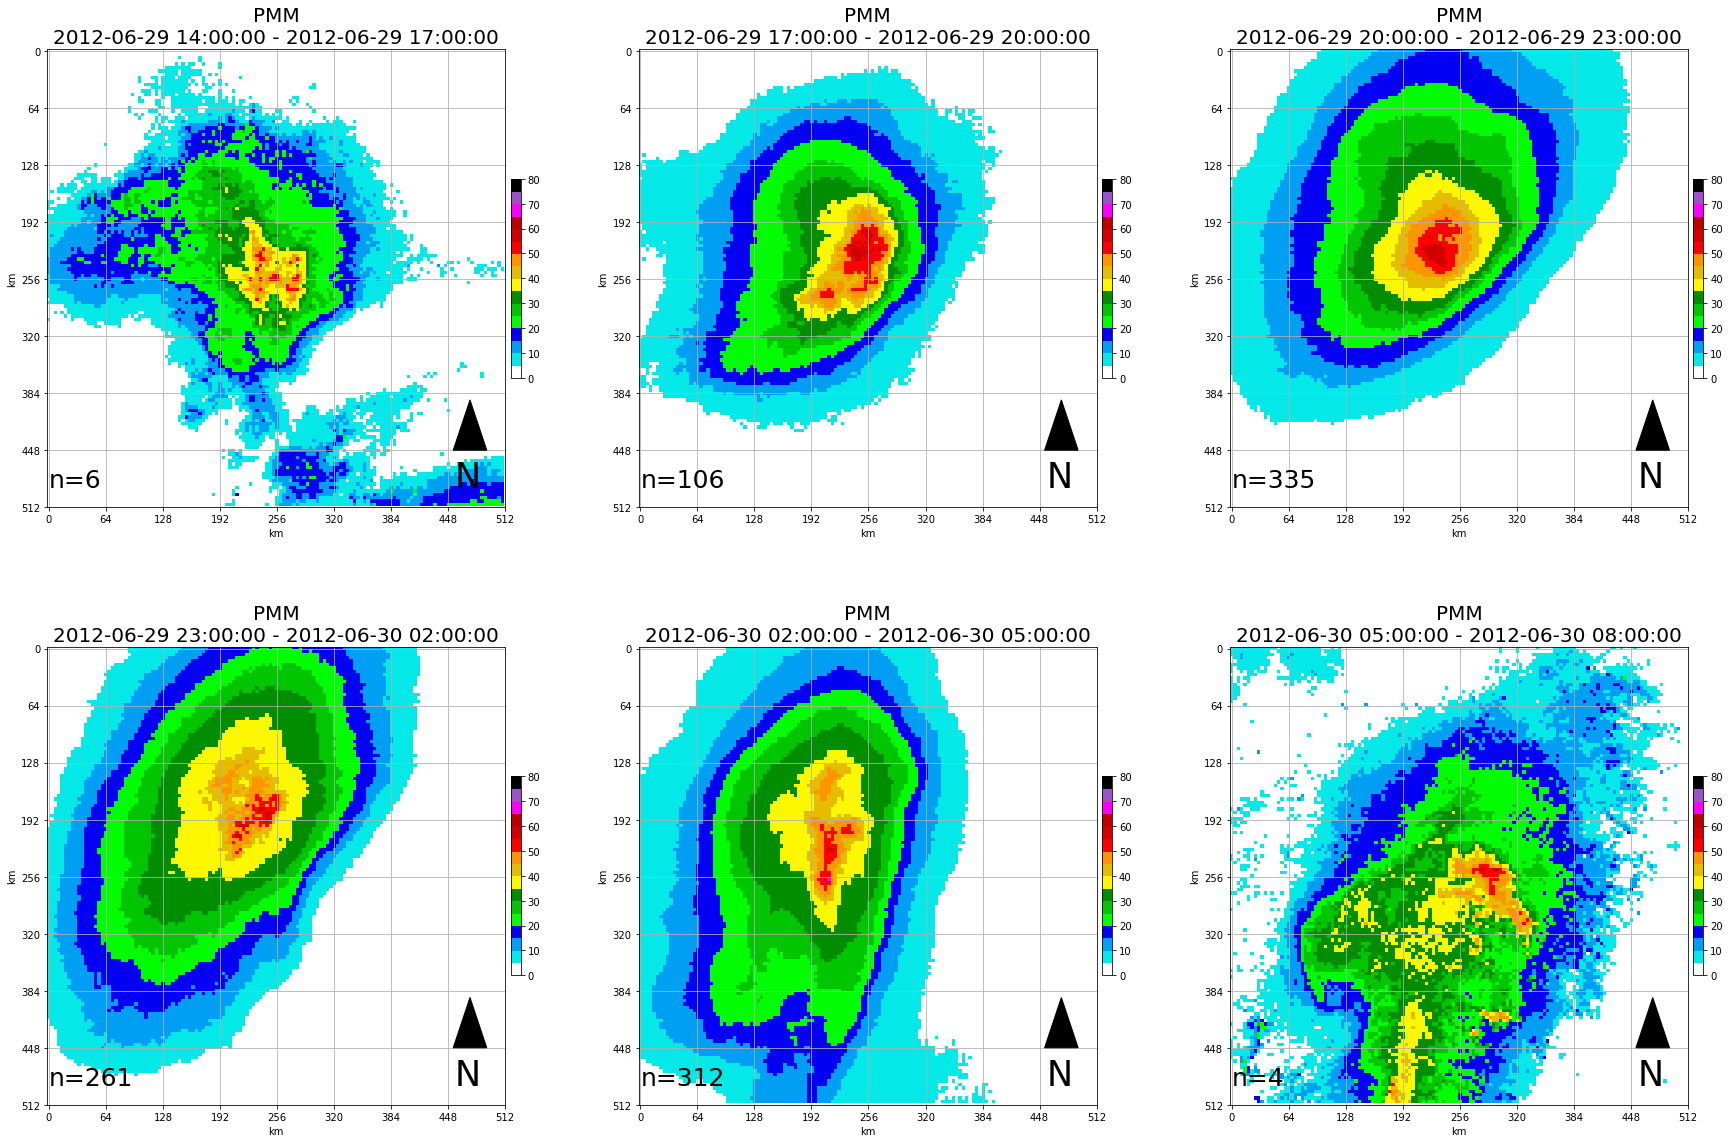

In [6]:
plt.rcParams['figure.figsize'] = 25, 25
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 10

for ix, dtime in enumerate(pd.date_range(start=start_time, end=end_time, freq='3H')):
    
    period_start = (dtime + datetime.timedelta(hours=1.5)) - datetime.timedelta(hours=1.5)
    period_end = (dtime + datetime.timedelta(hours=1.5)) + datetime.timedelta(hours=1.5)
    
    df_ = df_sub[(df_sub.date_utc >= period_start) & (df_sub.date_utc <= period_end)]
    
    imgs = get_img_list(df_.index.values, haz_type="wind", keep_missing=False)
    
    ax = plt.subplot(3, 3, ix+1)

    img_pmm = _run_pmm_one_variable(imgs)
    ax.set_title("PMM\n{} - {}".format(period_start, period_end), fontsize=20)
    ax = draw_box_plot(ax, img_pmm)
    ax.text(0, 130, "n={}".format(len(imgs)), fontsize=25)
    
plt.tight_layout()

### Load the keras model to identify only QLCS structures

Run the "Train_Model" notebook first.

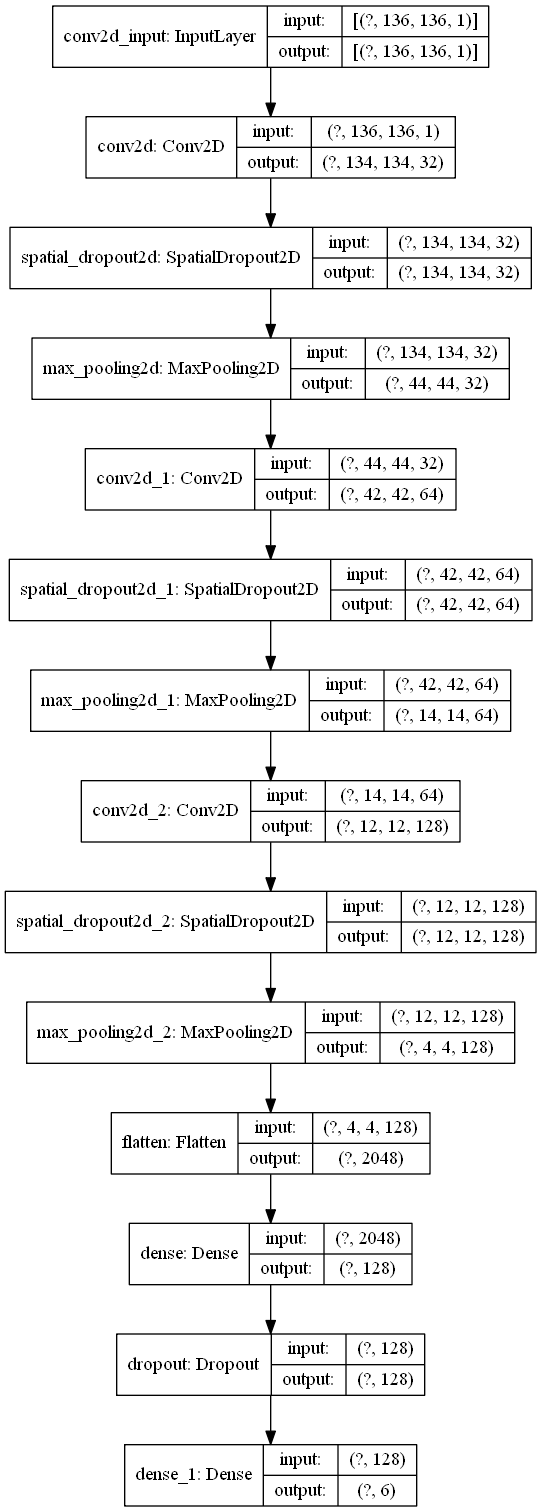

In [7]:
from tensorflow import keras

model = keras.models.load_model("../data/models/morph_model_v01.h5")

keras.utils.plot_model(model, show_shapes=True)

### Transform the images into keras-friendly representations and then have the model attempt to classify

In [8]:
from numpy import expand_dims
import numpy as np

imgs = get_img_list(df_sub.index.values, haz_type="wind", keep_missing=True)
imgs = expand_dims(imgs, 3)
imgs = imgs / 80 #normalize

preds = model.predict(imgs)

lookup = {0:'Cellular', 1:'QLCS', 2:'Tropical', 3:'Other', 4:'Noise', 5:'Missing'}

for index, cls in lookup.items():

    df_sub[cls] = preds[:, index]

df_sub['Classification'] = [lookup[x] for x in np.argmax(preds, axis=1)]

### Plot the reports based on their classifications

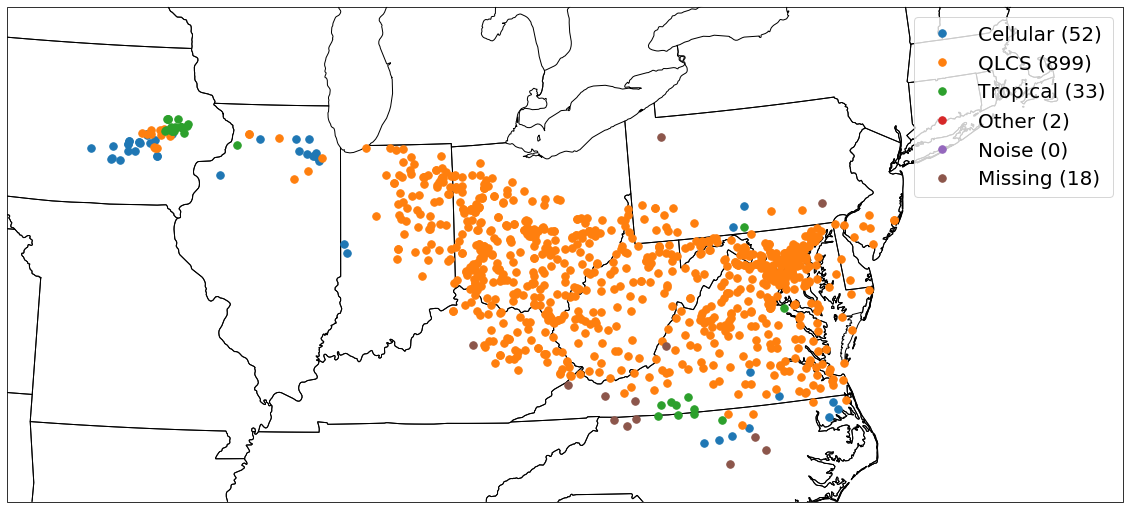

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 20

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=-88))
ax.set_extent([-95, -70, 35, 43])
ax.coastlines()
ax.add_feature(cfeature.STATES)

for index, cls in lookup.items():
    df_ = df_sub[df_sub.Classification==cls]
    
    plt.plot(df_.slon, df_.slat, '.', ms=15, label="{} ({})".format(cls, len(df_)), transform=ccrs.PlateCarree())
    
plt.legend(prop={"size":20})